# Introduction:
##  Module 8 Assignment: "Classification via KNN & SVM"

The goal of this assignment is to explore and develop various classification models beyond binary logistic regression, aiming to improve the prediction accuracy for identifying customers likely to purchase an additional insurance product from the company.

Team members :
- Mahesh Rajendra
- Mamatha Singh
- Bhavitha Bojja
- Nandini Srirapu

## Plan / Methodology:
1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Wrangling** : In this phase, raw data is transformed and structured into a more usable format for analysis and modeling.
 - Checked for Null or invalid values
 - Trrated outliers.

3. **Exploratory Data Analysis** : In this phase, the data is examined to understand its key characteristics and reveal patterns and relationships. This involves techniques such as visualizations and statistical summaries. The insights gained from this analysis assist in subsequent phases by guiding in feature selection and helping to choose the most appropriate algorithms.

4. **Data Preparation** :
- In this phase we mapped Target varibale's catogorical values(Y,N) to binery values(1,0).


- Handeled outliers with log transformations and wisconcin method with modified bounds.


5. **Feature Selection** : We used Decision Tree Classifier and calculated feature importance and selected features showing high importance score and we also used SMOTE method for over sampling the minority classes.

6. **Prepped Data Review** : After treating outliers the histograms and box plots are shown to check the presence of outliers and after feature selection, Correlation matrix is shown to see the correlations of prepped data.

7. **Model Development and Evaluation**: Built 3 Logistic Regression models with different explanatory variables.

8. **Select Models** : After considering all the Matrics Second model is selected as best performing than other models and made predictions on test data.

## Data Acquisition

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/refs/heads/main/insurance%20company%20Data.csv')

In [3]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [86]:
df.isnull().sum()

,0
TARGET,0
loyalty,0
ID,0
age,0
city,0
LOR,0
prod_A,0
type_A,0
type_B,0
prod_B,0


- All features are in correct dataype
- There are know reported null values of far.

In [87]:
# summary stats
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


## Exploratory Data Analysis

## Univariate Analysis

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

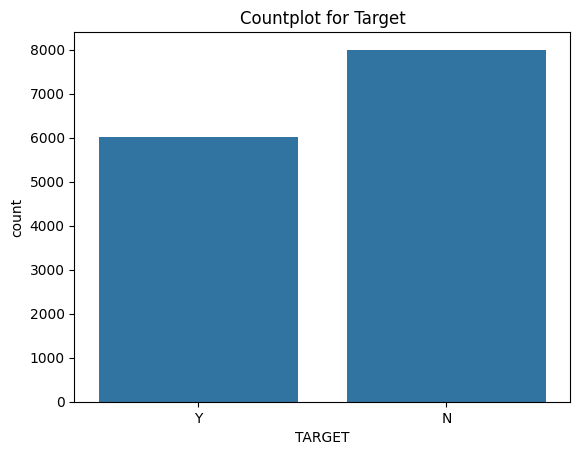

In [89]:
# countplot for Target
sns.countplot(x= 'TARGET', data=df)
plt.title('Countplot for Target')
plt.show()

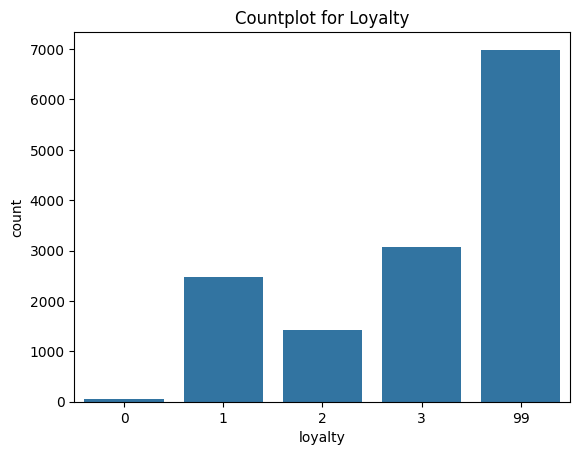

In [90]:
# countplot for loyalty with labels
sns.countplot(x='loyalty',data = df)
plt.title('Countplot for Loyalty')
plt.show()

- There are more unclassified members.






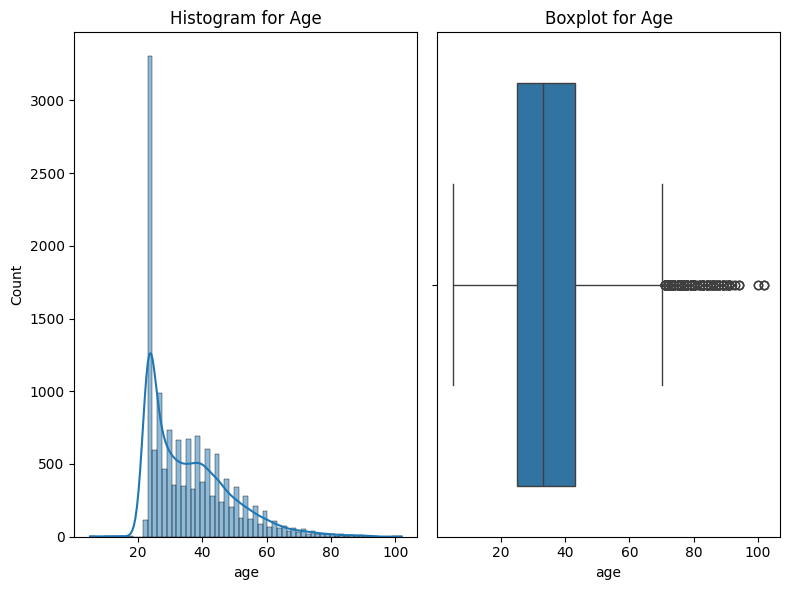

,age
count,14016.000000
mean,35.882920
std,12.974634
min,5.000000
25%,25.000000
50%,33.000000
75%,43.000000
max,102.000000


In [91]:

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Histogram with KDE
sns.histplot(x='age', data=df, kde=True, ax=axs[0])
axs[0].set_title('Histogram for Age')

# Boxplot
sns.boxplot(x='age', data=df, ax=axs[1])
axs[1].set_title('Boxplot for Age')

plt.tight_layout()
plt.show()

df['age'].describe()

- There are outliers, data is right skewed.


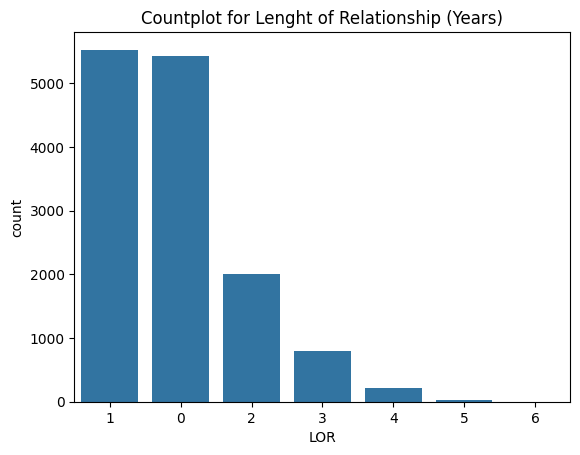

In [92]:
# countplot for LOR
sns.countplot(x='LOR',data = df,order=df['LOR'].value_counts().index)
plt.title('Countplot for Lenght of Relationship (Years)')
plt.show()

- Most of the customer has no more than one year relation with the company.

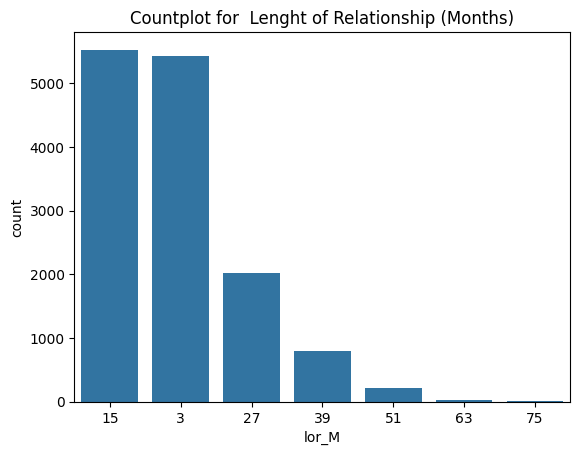

In [93]:
# Countplot for LOR_M
sns.countplot(x='lor_M',data = df,order=df['lor_M'].value_counts().index)
plt.title('Countplot for  Lenght of Relationship (Months)')
plt.show()

- Most of the custmers lasts for only 15 months.

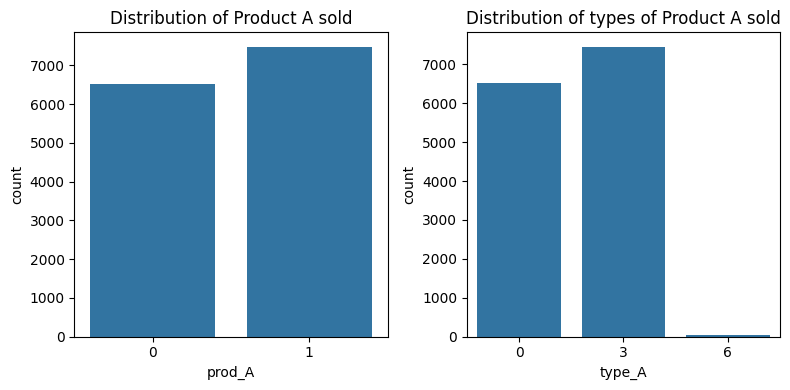

In [94]:

# countplots for Prod A
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='prod_A', data = df, ax = axs[0])
axs[0].set_title('Distribution of Product A sold')

sns.countplot(x='type_A', data = df, ax = axs[1])
axs[1].set_title('Distribution of types of Product A sold')

plt.tight_layout()
plt.show()

- More than 7000 customers bought Product A.
- Among the three types of Product A, type 3 is best seller.

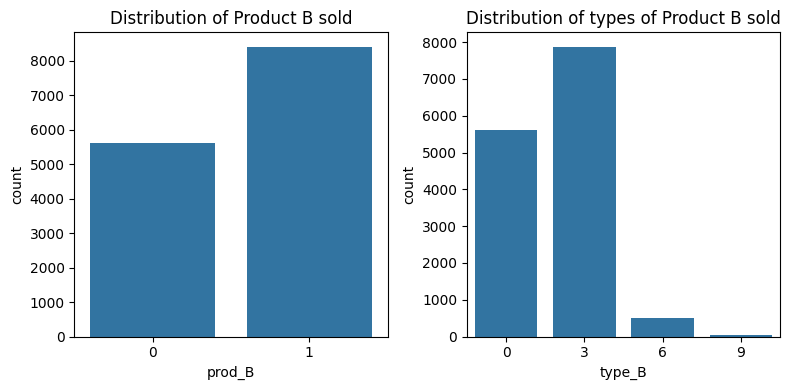

In [95]:
# Countplot for Prod_B

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='prod_B', data = df, ax = axs[0])
axs[0].set_title('Distribution of Product B sold')

sns.countplot(x='type_B', data = df, ax = axs[1])
axs[1].set_title('Distribution of types of Product B sold')

plt.tight_layout()
plt.show()

- More than 8000 customers bought Product B.
- Among four types of product B, the best seller is type 3.

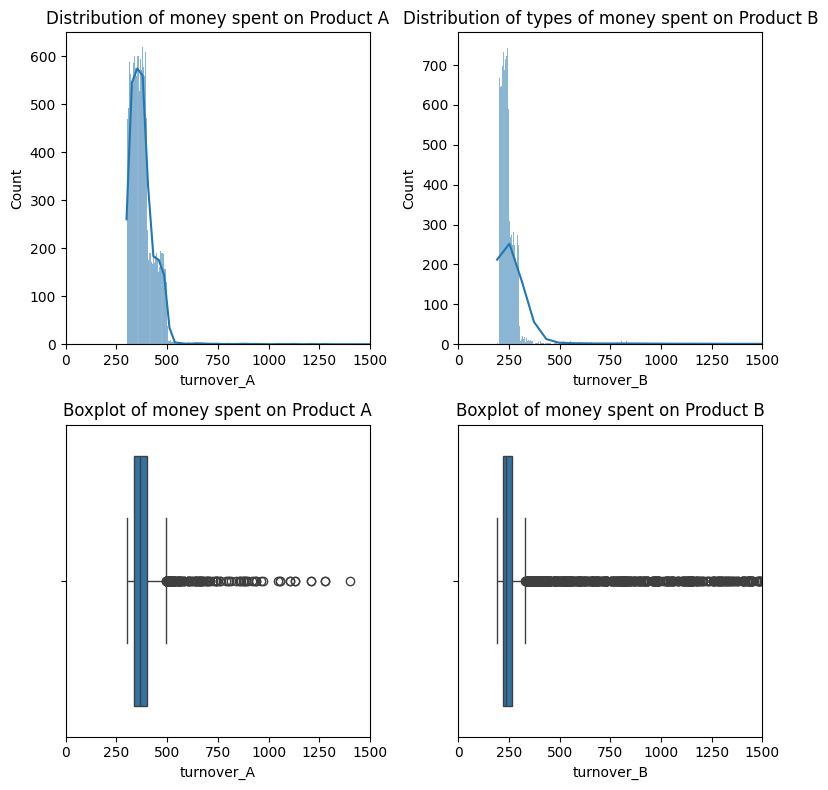

,turnover_A,turnover_B
count,14016.000000,14016.000000
mean,379.161320,328.628207
std,92.612207,475.616525
min,300.095909,191.962852
25%,334.919412,219.406925
50%,367.891493,237.656757
75%,399.744924,264.131538
max,5568.784139,12249.084770


In [96]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')
axs[0][0].set_xlim(0, 1500)

sns.histplot(x='turnover_B', data = df, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')
axs[0][1].set_xlim(0, 1500)


# boxplots
sns.boxplot(x='turnover_A', data = df, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')
axs[1][0].set_xlim(0, 1500)

sns.boxplot(x='turnover_B', data = df, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')
axs[1][1].set_xlim(0, 1500)

plt.tight_layout()
plt.show()

df[['turnover_A','turnover_B']].describe()

- From the histogram and summary statistics we can say that customers spent more on Product A than on Product B despite being more sold than product A.
- By this we can say that perhaps Product A costs more than Product B.
- There are potential outliers to be treated.

In [97]:
df['contract'].value_counts()

,count
contract,
2,14016


- There is only one type of Contract in whole dataset,so this feature can be considerable to drop as it has no variance and inluence on model.

In [98]:
# Maped Target variable to int

df_edited = df.copy()
df_edited['TARGET'] = df_edited['TARGET'].map({'N': 0, 'Y': 1})
df_edited['TARGET'].value_counts()



,count
TARGET,
0,8000
1,6016


In [99]:
# Cross checking
df['TARGET'].value_counts()

,count
TARGET,
N,8000
Y,6016


## Bivariate Analysis

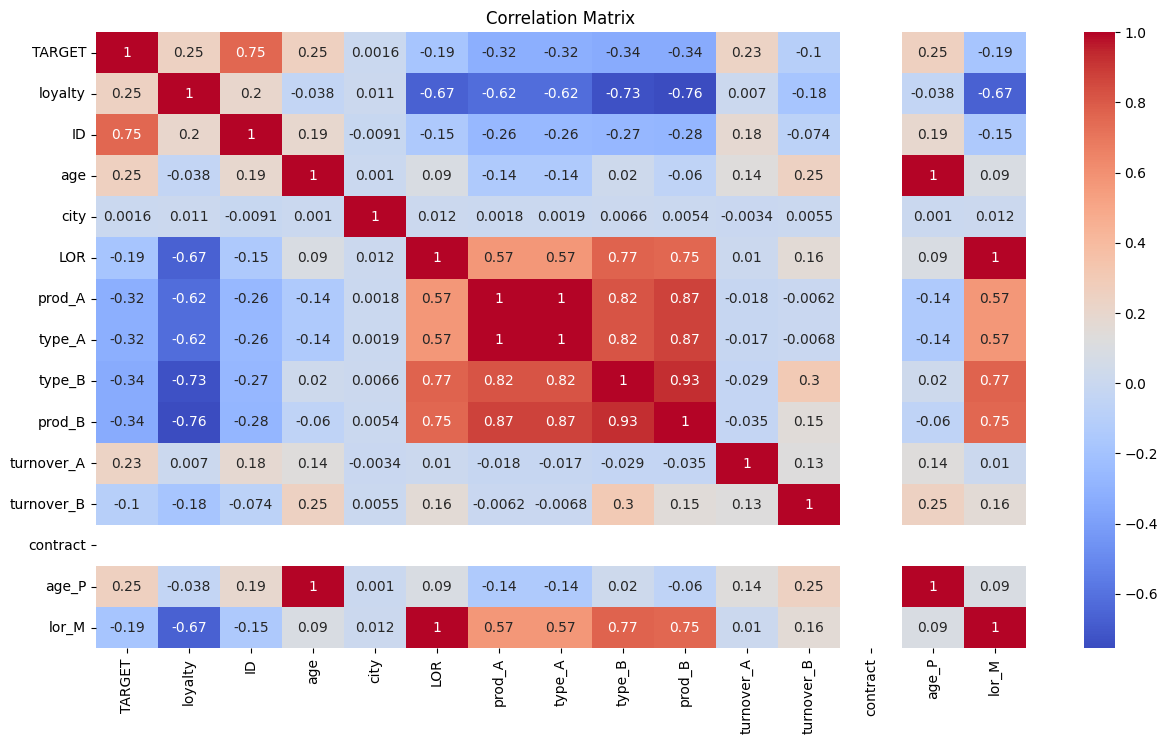

In [100]:
# plot corelation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df_edited.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- From the Correlation matrix Loyalty, Age, Turnover_A are showing positive correlations with Target variable.

- Prod_A and Prod_B are showing negative correlation with Target variable.

- There some variable having high collinearty, indicating multi-collinearty.

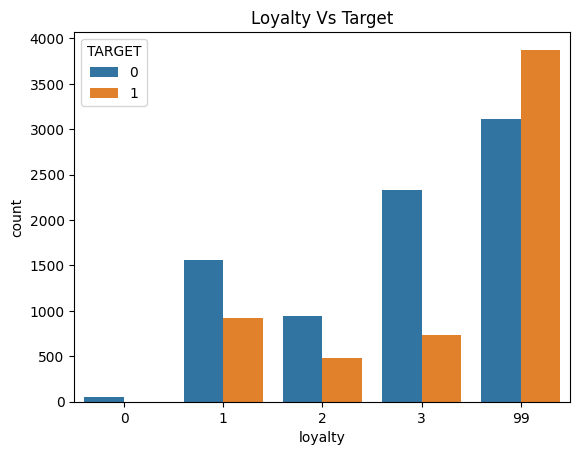

In [101]:
# Loyalty Vs Target
sns.countplot(x= 'loyalty', data=df_edited, hue='TARGET')
plt.title('Loyalty Vs Target')
plt.show()

- Customers in unclssified level of loyalty are more likely to buy new product followed by customers in loyalty level 1.

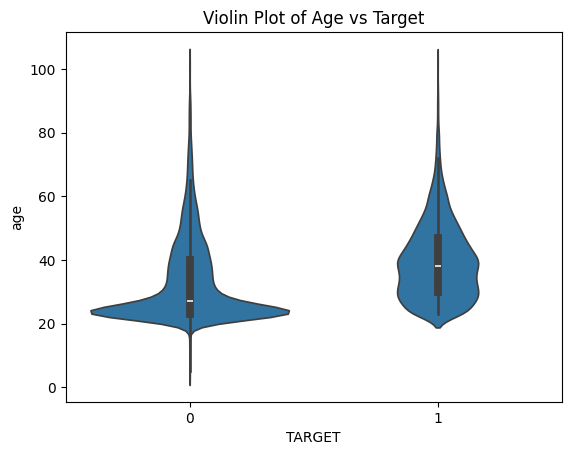

In [102]:
# Voilen plots for age and Target
sns.violinplot(x='TARGET', y='age', data=df_edited)
plt.title('Violin Plot of Age vs Target')
plt.show()

- From the violin plot we can say that, customers who are 35 years old are more likely to buy new porduct and customers of age group 20 to 25 are likely to not buy new product.

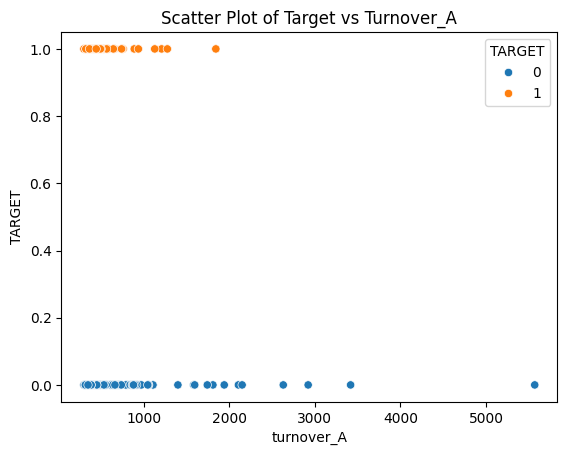

In [103]:
# Scatter plot for Target and turnover_A
sns.scatterplot(x='turnover_A', y='TARGET', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of Target vs Turnover_A')
plt.show()

- Customers who have less turnover_A  are the most who bought new product, as we can see the cluster in low ranges of turnover_A.

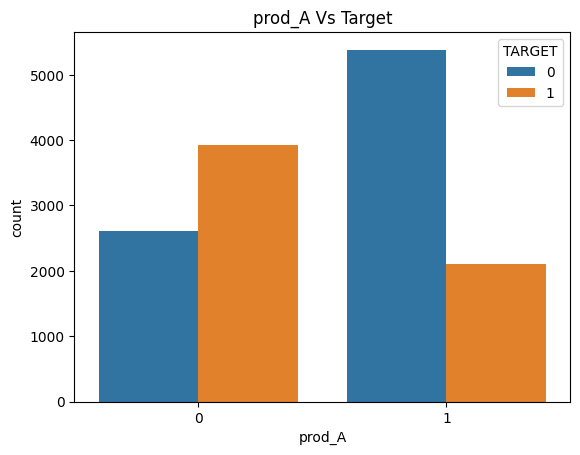

In [104]:
# ploting relation between Prod_A and Target
sns.countplot(x= 'prod_A', data=df_edited, hue='TARGET')
plt.title('prod_A Vs Target')
plt.show()

- The graph states that customers who did not buy product A are more likely to buy a new product.

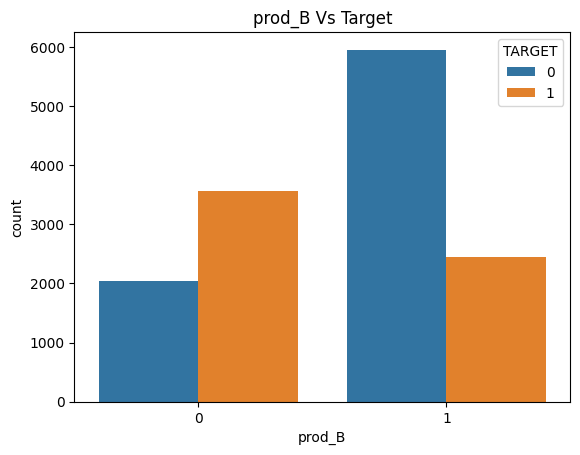

In [105]:
# ploting relation between prod_B and Target
sns.countplot(x= 'prod_B', data=df_edited, hue='TARGET')
plt.title('prod_B Vs Target')
plt.show()

- The graph states that customers who did not buy product B are more likely to buy a new product.

In [106]:
# Make a new column where customers buy both prod_A and prod_B
df_edited['prod_AB'] = df_edited['prod_A'] + df_edited['prod_B']
df_edited['prod_AB'] = df_edited['prod_AB'].map({0: 0, 1: 0, 2: 1})
df_edited['prod_AB'].value_counts()

,count
prod_AB,
1,7482
0,6534


- Made a new column (prod_AB) to examine the purchase behaviour of customers who bought both the products A and B to Target variable.

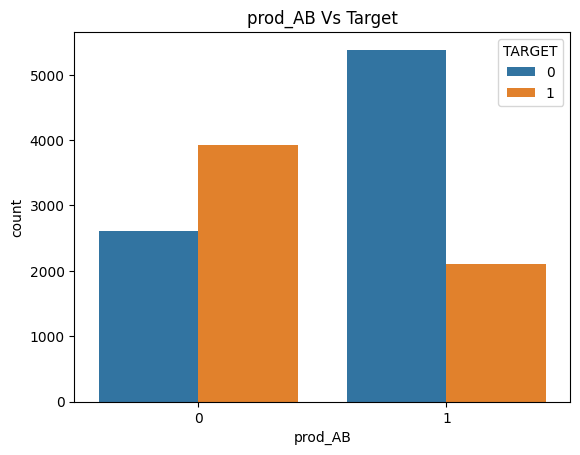

In [107]:
# ploting relation between prod_B and Target
sns.countplot(x= 'prod_AB', data=df_edited, hue='TARGET')
plt.title('prod_AB Vs Target')
plt.show()

- We can say that customers who did not buy both of the products A and B are more likely to buy new product.

In [108]:
# Drop Prod_AB
df_edited.drop('prod_AB', axis=1, inplace=True) #droped newly created column prod_AB which is used only for visualization.

## Multivariate Analysis

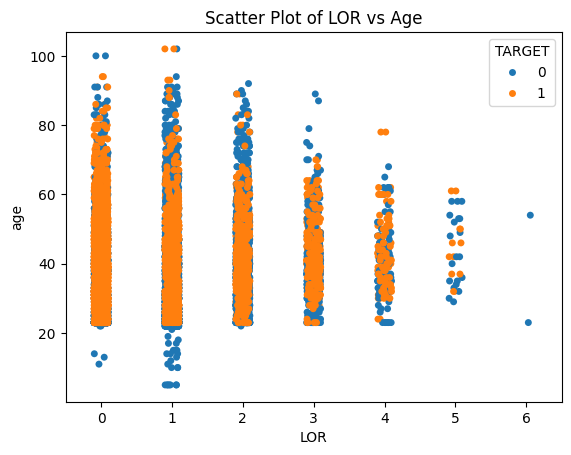

In [109]:
# Strip plot for LOR and age
sns.stripplot(y='age', x='LOR', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of LOR vs Age')
plt.show()


- Customers with older than around 25 years and with low LOR are more likely to buy newproduct.

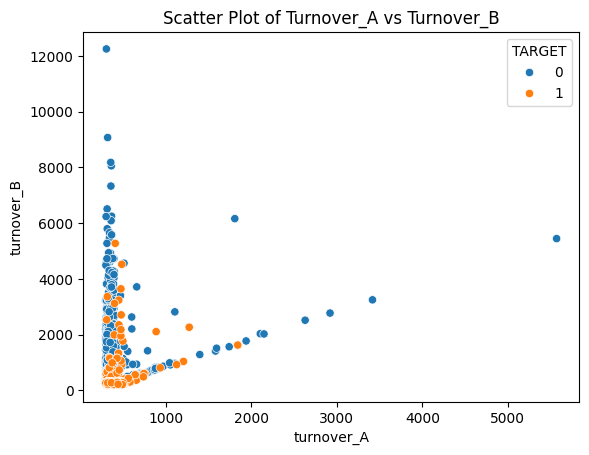

In [110]:
# Scatter plot for turnover_A and turnover_B
sns.scatterplot(x='turnover_A', y='turnover_B', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of Turnover_A vs Turnover_B')
plt.show()

- Customers who did not spent more on product A and product B are more likely to new a new product.

## Data Preparation and Review

In [111]:
import numpy as np

In [112]:
# log transform age
df_edited['age'] = np.log10(df_edited['age'])
df_edited['age'].describe()

,age
count,14016.000000
mean,1.529556
std,0.145460
min,0.698970
25%,1.397940
50%,1.518514
75%,1.633468
max,2.008600


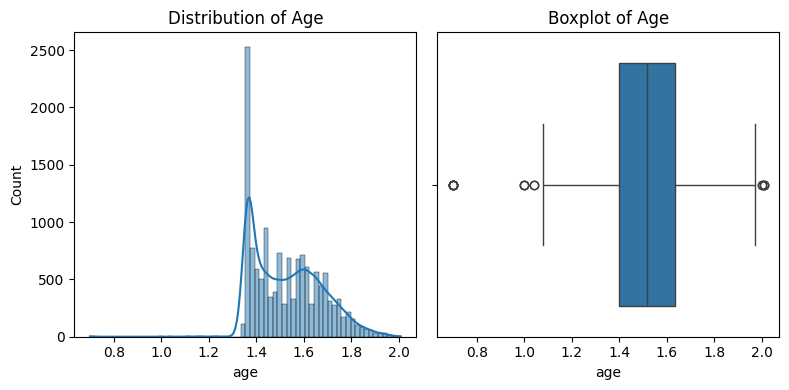

In [113]:
# Histogram and box plot for age
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(x='age', data = df_edited, ax = axs[0], kde = True)
axs[0].set_title('Distribution of Age')

sns.boxplot(x='age', data = df_edited, ax = axs[1])
axs[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()


- There are still some outliers, so lets try clipping method


In [114]:
# Calculate IQR for age
Q1 = df_edited['age'].quantile(0.25)
Q3 = df_edited['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip age with lower and upper bound
df_edited['age'] = df_edited['age'].clip(lower_bound, upper_bound)



- np.clip() will enable values smaller than lower_bound to become lower_bound, and values larger than upper_bound to become upper_bound.

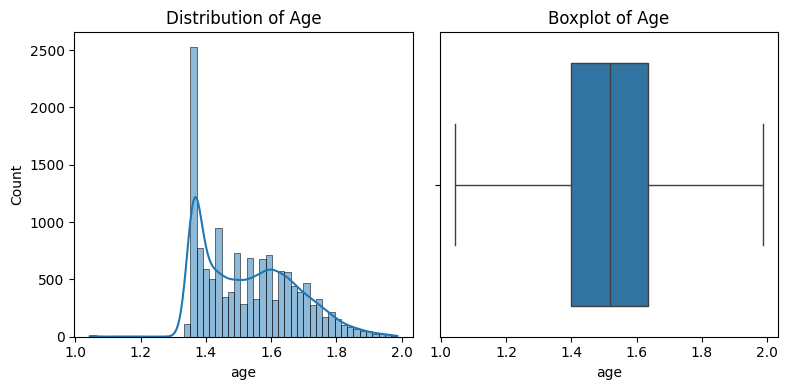

In [115]:
# Histogram and box plot for age
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(x='age', data = df_edited, ax = axs[0], kde = True)
axs[0].set_title('Distribution of Age')

sns.boxplot(x='age', data = df_edited, ax = axs[1])
axs[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

In [116]:
# log transform 'turnover_A' and 'turnover_B'
df_edited['turnover_A'] = np.log10(df_edited['turnover_A'])
df_edited['turnover_B'] = np.log10(df_edited['turnover_B'])

df_edited[['turnover_A','turnover_B']].describe()

,turnover_A,turnover_B
count,14016.000000,14016.000000
mean,2.572627,2.423226
std,0.066683,0.198162
min,2.477260,2.283217
25%,2.524940,2.341250
50%,2.565720,2.375950
75%,2.601783,2.421820
max,3.745760,4.088104


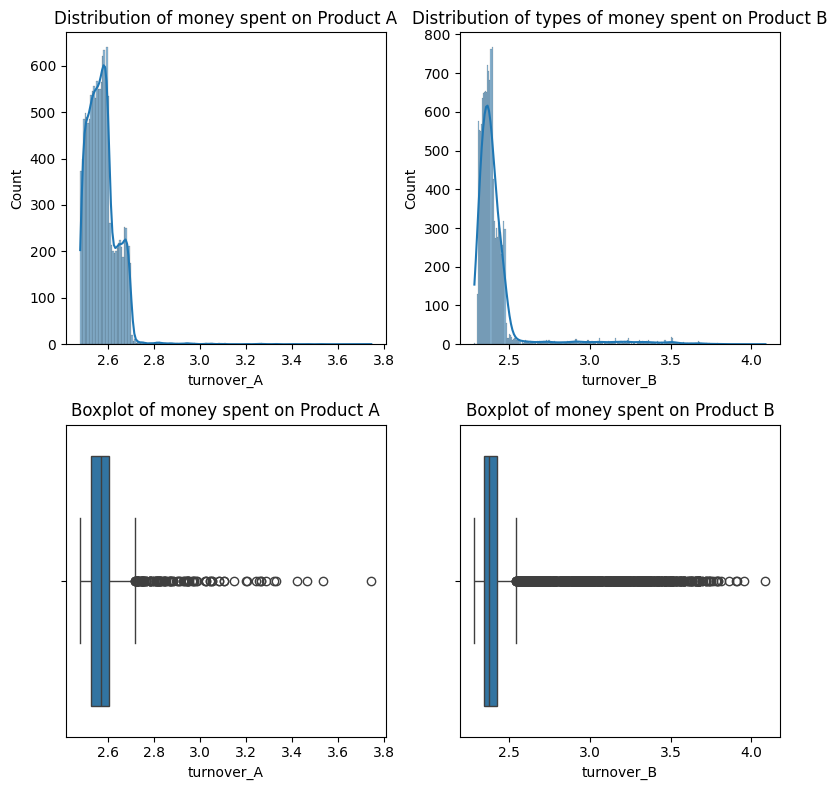

In [117]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df_edited, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')


sns.histplot(x='turnover_B', data = df_edited, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')



# boxplots
sns.boxplot(x='turnover_A', data = df_edited, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')


sns.boxplot(x='turnover_B', data = df_edited, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')


plt.tight_layout()
plt.show()

In [118]:
# calculate IQR for 'turnover_A' and 'turnover_B'
Q1_A = df_edited['turnover_A'].quantile(0.25)
Q3_A = df_edited['turnover_A'].quantile(0.75)

Q1_B = df_edited['turnover_B'].quantile(0.25)
Q3_B = df_edited['turnover_B'].quantile(0.75)

IQR_A = Q3_A - Q1_A
IQR_B = Q3_B - Q1_B

# calculate lower and upper bound
lower_bound_A = Q1_A - 1.5 * IQR_A
upper_bound_A = Q3_A + 1.5 * IQR_A

lower_bound_B = Q1_B - 1.5 * IQR_B
upper_bound_B = Q3_B + 1.5 * IQR_B

# Clip 'turnover_A' and 'turnover_B' with lower_bound and upper_bound
df_edited['turnover_A'] = df_edited['turnover_A'].clip(lower_bound_A, upper_bound_A)
df_edited['turnover_B'] = df_edited['turnover_B'].clip(lower_bound_B, upper_bound_B)


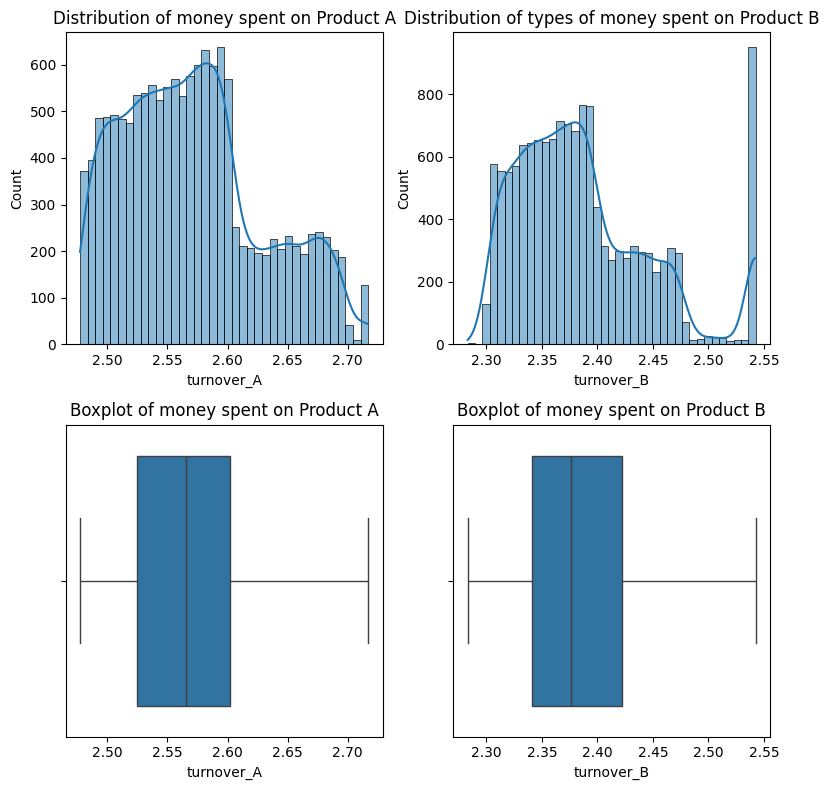

In [119]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df_edited, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')


sns.histplot(x='turnover_B', data = df_edited, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')



# boxplots
sns.boxplot(x='turnover_A', data = df_edited, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')


sns.boxplot(x='turnover_B', data = df_edited, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')


plt.tight_layout()
plt.show()

In [120]:
# Drop ID, City
df_edited.drop(['ID','city'], axis=1, inplace=True)

- Droping Columns with IDs, codes as they dont provide any useful information for model.

- Checking for multicollinearity in dataset and droping the hightest multicollinear variable.

## Feature Selection

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
#Split target
X = df_edited.drop('TARGET', axis=1)
y = df_edited['TARGET']

In [124]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(random_state=42)

- Using Decision Tree Classifer for selecting features which has more importance.

In [125]:
# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
feature_importance_df

Feature Importances:


,Feature,Importance
7,turnover_A,0.440717
8,turnover_B,0.359986
10,age_P,0.068051
0,loyalty,0.038803
1,age,0.038264
3,prod_A,0.016024
2,LOR,0.012860
11,lor_M,0.012419
4,type_A,0.008036
6,prod_B,0.002464


Text(0.5, 1.0, 'Feature Importances')

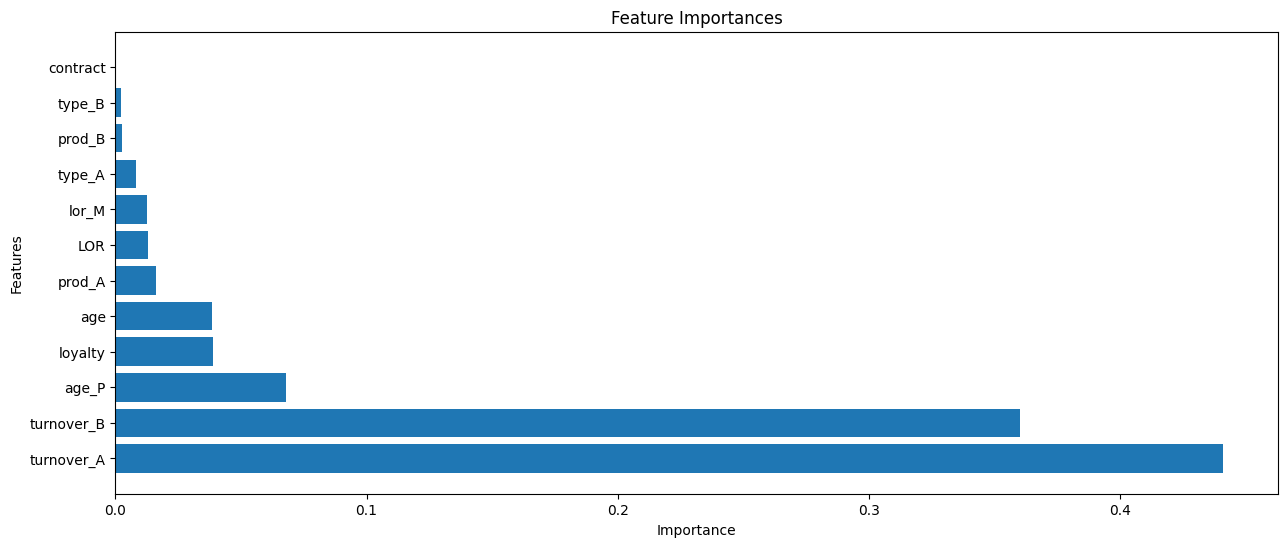

In [126]:
# Bar chart on features
plt.figure(figsize=(15, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances')


- Based on the feature importance values, features with very low importance can potentially be dropped, as they contribute little to the predictive power of the model.
- Features with Very Low Importance (< 0.01):
  - contract
  - Prod_B
  - type_B
  - type_A

- And droping age_P and lor feature as they are highly correlated with age and Lor_m.

In [127]:
# Filter out features with importance less than 0.01
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature'].tolist()
# Append age
features_to_drop.extend(['age_P','LOR'])

# Drop the features
df_reduced = df_edited.drop(features_to_drop, axis=1)

In [128]:
df_reduced.head()


,TARGET,loyalty,age,prod_A,turnover_A,turnover_B,lor_M
0,1,99,1.819544,0,2.523175,2.422788,3
1,1,1,1.653213,1,2.596306,2.454700,39
2,1,1,1.623249,1,2.534256,2.542675,27
3,1,99,1.491362,0,2.656824,2.384428,3
4,1,99,1.792392,0,2.584984,2.457895,3


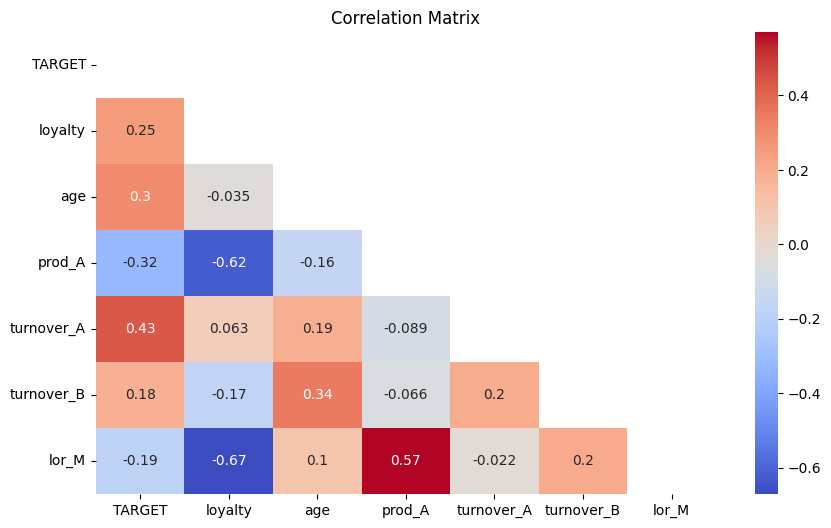

In [129]:
# Calculate correlation matrix
corr_matrix = df_reduced.corr()

# mask for without upperright triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

- This are the correlations after data preparation, which are similar to before with minimal changes in some features.

In [130]:
# Train Test split
from sklearn.model_selection import train_test_split

X = df_reduced.drop('TARGET', axis=1)
y = df_reduced['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (11212, 6)
Shape of X_test: (2804, 6)
Shape of y_train: (11212,)
Shape of y_test: (2804,)


In [131]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before SMOTE', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After SMOTE', counter)

Before SMOTE Counter({0: 6393, 1: 4819})
After SMOTE Counter({0: 6393, 1: 6393})


- By using SMOTE, we oversampled the minorty class to as data was imbalanced.

## Predictive Modeling

In [132]:
# Calculate Null error rate
y_train.values.sum() / y_train.shape[0]


0.4298073492686407

### Null Error Rate

we know that 42.9% of the people in the training set bought new product, we could achieve a training model accuracy of (1 - .429) = 57.1% by simply predicting "will not buy new product" for each Customer. The accuracy you we ae attaining should exceed the __null error rate__. If not,model is unlikely to be of any value.


### KNN's

- For selecting optimum K value, we are using GridsearchCV method.

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
X_train_sm.columns

Index(['loyalty', 'age', 'prod_A', 'turnover_A', 'turnover_B', 'lor_M'], dtype='object')

In [135]:
# Create a KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for 'n_neighbors'
param_grid = {'n_neighbors': range(1, 31)}

In [136]:
# Set up Grid Search with roc_auc as the scoring metric
grid_search1 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


# Selecting Explanatory features for knn1
X1  = X_train_sm[['age','turnover_A','turnover_B']]

# Fit the grid search to the training data
grid_search1.fit(X1, y_train_sm)

# Get the best parameters and score
best_params = grid_search1.best_params_
best_score = grid_search1.best_score_

# Print the best parameters and score
print(f"The optimal value of k is: {best_params}")
print(f"The corresponding accuracy score is: {best_score:.2f}")


The optimal value of k is: {'n_neighbors': 1}
The corresponding accuracy score is: 0.87


- The first KNN model got best k value as 1 with accuracy of 87% .

In [81]:
# Set up Grid Search with roc_auc as the scoring metric
grid_search2 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search2.fit(X_train_sm, y_train_sm)

# Get the best parameters and score
best_params = grid_search2.best_params_
best_score = grid_search2.best_score_

# Print the best parameters and score
print(f"The optimal value of k is: {best_params}")
print(f"The corresponding accuracy score is: {best_score:.2f}")

The optimal value of k is: {'n_neighbors': 1}
The corresponding accuracy score is: 0.90


- The second KNN model got best k value as 1 with accuracy of 90%.

### SVM's

In [141]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [145]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Selecting Explanatory features for SVM1
X1  = X_train_sm[['age','turnover_A','turnover_B']]

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X1)



# Set up cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(svm_model, X, y_train_sm, cv=cv, scoring='accuracy')

# Print cross-validation scores and the average score
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Average cross-validation accuracy for SVM1: {cv_scores.mean():.2f}")



Cross-validation scores for each fold: [0.72439406 0.70825186 0.72467736 0.72193977 0.71372702]
Average cross-validation accuracy for SVM1: 0.72


- First SVM model got average accuracy of 72%.

In [146]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X_train_sm)



# Set up cross-validation with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(svm_model, X, y_train_sm, cv=cv, scoring='accuracy')

# Print cross-validation scores and the average score
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Average cross-validation accuracy SVM2: {cv_scores.mean():.2f}")

Cross-validation scores for each fold: [0.75215012 0.75322644 0.74384044 0.74775127 0.74071177]
Average cross-validation accuracy SVM2: 0.75


- Second SVM model got accuracy of 75%.

## Model Selection and testing on test data

- The metrics we can say that KNNs out performed the SVMs in terms of accuracy.

- The second KNN model has highest accuracy among all other models on training data, so we are selecting that model to make predictions on test data set.

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [152]:
# Use the best KNN model from Grid Search
knn_best = grid_search2.best_estimator_

# Get the best k value from the Grid Search
best_k = grid_search2.best_params_['n_neighbors']
print(f"The optimal value of k is: {best_k}")


# Predict on the test set
y_pred = knn_best.predict(X_test)

# Evaluate the model's accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with optimal k ({best_k}): {test_accuracy:.2f}")

The optimal value of k is: 1
Test set accuracy with optimal k (1): 0.89


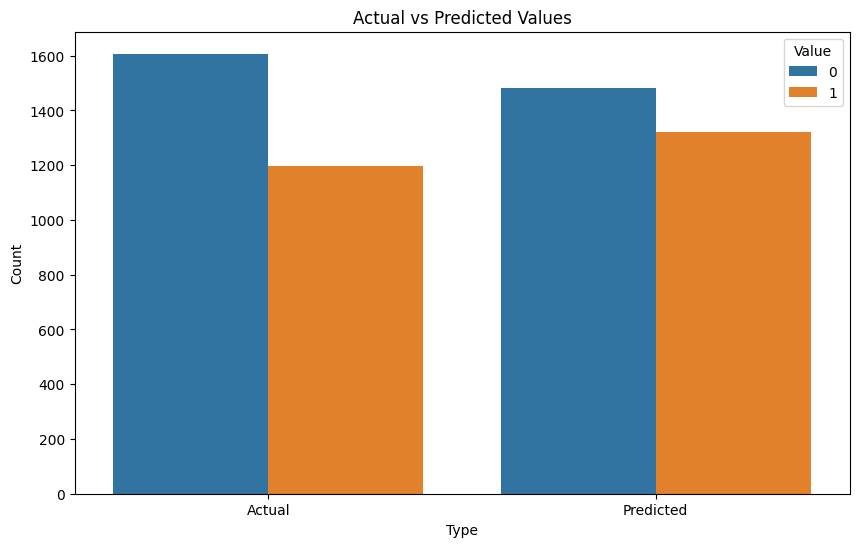

In [153]:
# Create a DataFrame for actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Visualize the actual vs. predicted values using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='variable', hue='value', data=pd.melt(results.reset_index(), id_vars=['index'], value_vars=['Actual', 'Predicted']))
plt.title('Actual vs Predicted Values')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Value', loc='upper right')
plt.show()

- The plot shows acutual and predicted values which are almost similar.


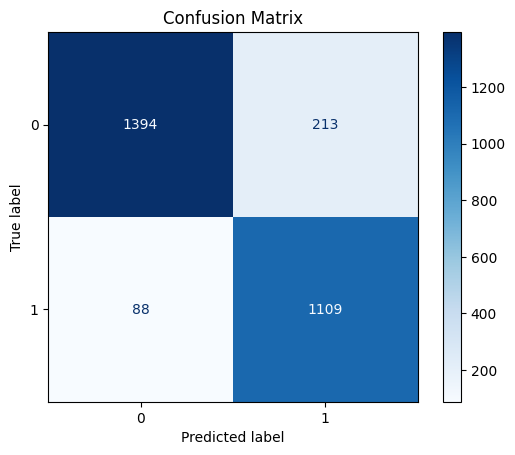

In [155]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

- The model got 1,109 positives and 1,394 negatives right.

- It made 213 mistakes by predicting positive when it shouldn't have, and 88 mistakes by missing actual positive cases.

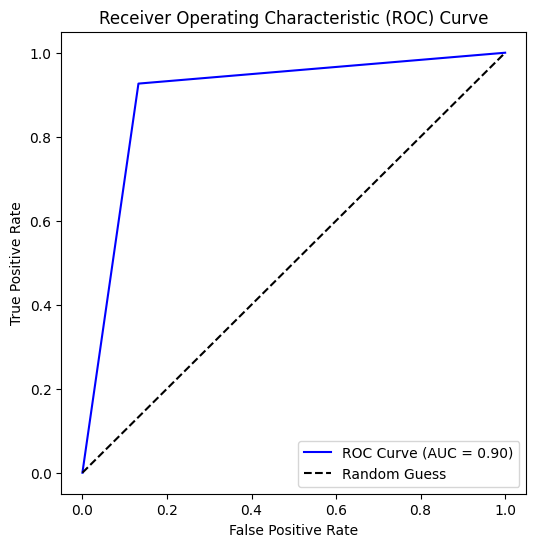

AUC Score: 0.90


In [156]:
# ROC Curve and AUC

y_prob = knn_best.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC score
print(f"AUC Score: {auc_score:.2f}")

In [157]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1607
           1       0.84      0.93      0.88      1197

    accuracy                           0.89      2804
   macro avg       0.89      0.90      0.89      2804
weighted avg       0.90      0.89      0.89      2804



## Conclusion

- KNNs out performed SVMs in terms of accuracy.

- Second KNN model showed 90% accuracy on training data and 89% on test data with 94% precision and 87% recall which are good metrics for a model.

- The goal of this assignment that is to achive higher accuracy with models other than logistic regression is achived.